<a href="https://colab.research.google.com/github/Yernazaz/FaceId-Cosine-Similarity-Score/blob/main/Diplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-8h07rzhq
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-8h07rzhq
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install keras_vggface

In [ ]:
!pip install keras_applications

In [ ]:
from keras_vggface.vggface import VGGFace

In [ ]:
model_vgg16 = VGGFace(model='vgg16')

model_resnet50 = VGGFace(model='resnet50')

model_senet50 = VGGFace(model='senet50')

In [ ]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras_vggface import utils

imagePath = 'MattiasSammer.jpeg'
image = cv2.imread(imagePath)
image = cv2.resize(image, (224, 224))
image = np.array(image,  "float64")

image = np.expand_dims(image, axis=0)
image = utils.preprocess_input(image, version=1)

preds = model_senet50.predict(image)
print("prediction: ", utils.decode_predictions(preds))

1/1 [==============================] - 4s 4s/step
prediction:  [[["b' John_Koskinen'", 0.0064553795], ["b' Wynton_Marsalis'", 0.0058781835], ["b' K-Maro'", 0.0057146624], ["b' Rossy_de_Palma'", 0.0050772345], ["b' Rachid_Badouri'", 0.0045305425]]]


In [ ]:
import cv2
import numpy as np


def extractFace(image, x1, x2, y1, y2):
    image_array = np.asarray(image, "uint8")

    y_min = min(y1, y2)
    y_max = max(y1, y2)
    x_min = min(x1, x2)
    x_max = max(x1, x2)
    face = image_array[y_min:y_max, x_min:x_max]

    try:
        face = cv2.resize(face, (224, 224) )
        face_array = np.asarray(face,  "uint8")
        return face_array
    except:
        return None

In [ ]:
!pip install dlib


In [ ]:
!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2
!bunzip2 mmod_human_face_detector.dat.bz2

--2024-02-28 18:03:20--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K   403KB/s    in 1.7s    

2024-02-28 18:03:22 (403 KB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]

bunzip2: Output file mmod_human_face_detector.dat already exists.


In [ ]:
import dlib
import matplotlib.pyplot as plt

detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
conf_thres = 0.6

def detectFace(image):
    image_array = np.asarray(image, "uint8")
    faces_detected = detector(image_array)
    if len(faces_detected) == 0:
        return []
    faces_extracted = []

    for face in faces_detected:

        conf = face.confidence
        if conf < conf_thres:
            continue

        x1 = face.rect.left()
        y1 = face.rect.bottom()
        x2 = face.rect.right()
        y2 = face.rect.top()


        face_array = extractFace(image, x1, x2, y1, y2)
        if face_array is not None:
            faces_extracted.append(face_array)

    return faces_extracted

In [ ]:
!pip install image-processing

In [ ]:
!pip install Pillow

In [ ]:
import os

def load_face(dir):
    faces = []
    for filename in os.listdir(dir):
        if filename.endswith("png") or filename.endswith("jpg") or filename.endswith("jpeg"):
            path = os.path.join(dir, filename)
            image = cv2.imread(path)
            face_array = detectFace(image)
            faces.extend(face_array)

    return faces

original_folder_name = 'original'
original_images_dir = os.path.join(".", original_folder_name)

labels = []
faces_data = []

for dirName in os.listdir(original_images_dir):
    path = os.path.join(original_images_dir, dirName)
    if os.path.isdir(path):
        faces = load_face(path)
        faces_data.append(faces)
        labels.append(dirName)

In [ ]:
from PIL import Image

processed_folder_name = 'processed'
processed_folder_dir = os.path.join(".", processed_folder_name)

for index, faces in enumerate(faces_data):
    l = labels[index]
    dir = os.path.join(processed_folder_dir, l)
    if not os.path.exists(dir):
        os.makedirs(dir)
    for index2, face in enumerate(faces):
        im = Image.fromarray(face)
        im.save(os.path.join(dir, f'{index2}.jpg' ))

In [ ]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

model = VGGFace(model='resnet50',
    include_top=False,
    input_shape=(224, 224, 3),  pooling='avg')

In [ ]:
def get_embedding(image):
    image = cv2.resize(image, (224, 224))
    image = image.reshape(1,224,224,3)
    image = np.array(image,  "float32")
    image = utils.preprocess_input(image, version=2)
    embedding = model.predict(image)
    return embedding[0]

In [ ]:
def get_emmbeddings_dir(dir_path):
    embeddings = []
    for filename in os.listdir(dir_path):
        if filename.endswith("png") or filename.endswith("jpg") or filename.endswith("jpeg"):
            path = os.path.join(dir_path, filename)
            image = cv2.imread(path)
            embedding = get_embedding(image)
            embeddings.append(embedding)
    return embeddings



def get_sys_embeddings():

    embedding_folder_name = 'processed'
    embedding_folder_dir = os.path.join(".", embedding_folder_name)

    labels = []
    embeddings = []

    for dirName in os.listdir(embedding_folder_dir):
        path = os.path.join(embedding_folder_dir, dirName)
        if os.path.isdir(path):
            embeddings.append(get_emmbeddings_dir(path))
            labels.append(dirName)

    return (labels, embeddings)

In [ ]:
(labels, sys_embeddings) = get_sys_embeddings()

1/1 [==============================] - 0s 79ms/step


In [ ]:
embedding_dic = {
    l: em for (l, em) in zip(labels, sys_embeddings)
}
import pickle
embedding_file_name = 'embeddings.pickle'
with open(embedding_file_name, 'wb') as f: pickle.dump(embedding_dic, f)

In [ ]:
from scipy.spatial.distance import cosine
def get_score(known_embeddings, candidate_embedding):
    score = 1
    for embedding in known_embeddings:
        score_temp = cosine(embedding, candidate_embedding)
        score = min(score, score_temp)

    return score

In [ ]:
def find_match(know_sys_embeddings, labels,  candidate_embedding, match_thres = 0.4):
    scores = []

    for _, embedding_list in enumerate(know_sys_embeddings):
        scores.append(get_score(embedding_list, candidate_embedding))

    min_score = min(scores)
    score_array = np.array(scores)
    if min_score < match_thres:
        return labels[score_array.argmin()]

    print(f"no match found, min score: {min_score} for {labels[score_array.argmin()]}")
    return None

In [ ]:
embedding_file_name = "embeddings.pickle"
with open(embedding_file_name, "rb") as f: embedding_dic = pickle.load(f)

labels = [key for key, value in embedding_dic.items()]
embeddings = [value for key, value in embedding_dic.items()]

In [ ]:
import cv2
imagePath_unknown = 'jaccie.jpeg'
image_unknown = cv2.imread(imagePath_unknown)
unknown_embedding = get_embedding(image_unknown)

print(find_match(embeddings, labels, unknown_embedding))

1/1 [==============================] - 0s 40ms/step
person2


In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import base64
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = base64.b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 21ms/step
person1


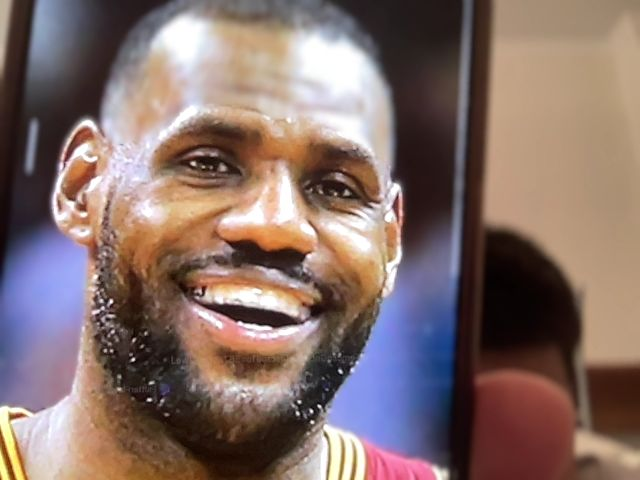

In [ ]:
image_file = take_photo()
image = cv2.imread(image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
unknown_embedding = get_embedding(image)
print(find_match(embeddings, labels, unknown_embedding))
from PIL import Image
display(Image.open(image_file))